After building and pre-transforming our dataset, in this notebook, we will explore and visualize our values to identify outliers or any transformation required to be able to model it afterward.

## Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
movies_df = pd.read_csv("../data/processed/transformation/movies_transformed_list.csv", index_col=0)

## EDA

### Exploratory

Let's start exploring our final dataset!

In [33]:
movies_df.head()

,index,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,status,tagline,title,video,vote_average,vote_count,status_code,status_message,cast,crew
0,0,False,NaN,NaN,0.0,"['Crime', 'Mystery', 'Drama', 'Thriller', 'Hor...",NaN,421114.0,tt0080495,es,...,Released,NaN,La capilla ardiente,False,3.0,3.0,NaN,NaN,"['266603', '19447', '1178853', '1686031', '148...","['30823', '50542', '100897', '100897', '1489713']"
1,1,False,NaN,NaN,840000.0,['Horror'],NaN,91817.0,tt0082367,en,...,Released,Alexandria High… class of '81 - All the studen...,Fear No Evil,False,4.4,14.0,NaN,NaN,"['158489', '1219410', '995591', '104060', '157...","['11470', '19172', '106667', '137193', '583023..."
2,2,False,NaN,"{'id': 184977, 'name': 'Shaolin Temple Collect...",0.0,['Action'],NaN,10275.0,tt0079891,cn,...,Released,NaN,The Shaolin Temple,False,7.1,53.0,NaN,NaN,"['1336', '1059241', '64707', '1342843', '13428...","['64690', '64688', '64687', '64689', '64692', ..."
3,3,False,NaN,NaN,0.0,[],NaN,270810.0,tt0080311,en,...,Released,NaN,...Maybe This Time,False,0.0,0.0,NaN,NaN,"['58063', '23', '1321846', '1203483', '94807',...","['97327', '166750', '1311627']"
4,4,False,/fpB6mNdhTG8vX3vjPLHGO6lKbiF.jpg,NaN,0.0,['Drama'],NaN,301845.0,tt0082047,es,...,Released,NaN,Barcelona sur,False,5.0,2.0,NaN,NaN,"['1062327', '974896', '1383246', '144268', '13...","['37540', '542246', '1057601', '1057601', '108..."


In [34]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251024 entries, 0 to 251023
Data columns (total 30 columns):
index                    251024 non-null object
adult                    250953 non-null object
backdrop_path            78574 non-null object
belongs_to_collection    10036 non-null object
budget                   250953 non-null object
genres                   251024 non-null object
homepage                 41136 non-null object
id                       250949 non-null float64
imdb_id                  250953 non-null object
original_language        250953 non-null object
original_title           250924 non-null object
overview                 228541 non-null object
popularity               250892 non-null object
poster_path              167245 non-null object
production_companies     251024 non-null object
production_countries     251024 non-null object
release_date             239266 non-null object
revenue                  250858 non-null float64
runtime                  2

In [35]:
movies_df.describe()

,id,revenue,runtime,vote_average,vote_count,status_code
count,250949.000000,2.508580e+05,231673.000000,250858.000000,250858.000000,32.0
mean,318163.369067,3.899136e+06,86.512658,3.629380,75.315398,34.0
std,204945.497325,4.071548e+07,181.943099,3.156725,598.579435,0.0
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,34.0
25%,122320.000000,0.000000e+00,78.000000,0.000000,0.000000,34.0
50%,318430.000000,0.000000e+00,90.000000,4.700000,1.000000,34.0
75%,488602.000000,0.000000e+00,103.000000,6.300000,6.000000,34.0
max,710872.000000,2.797801e+09,51420.000000,10.000000,25929.000000,34.0


We discovered we got many categorical columns we won't use. Time to remove them!

In [36]:
columns_to_remove = ["backdrop_path", "belongs_to_collection", "homepage", "index", "imdb_id", "id", "poster_path", "tagline", "status_code", "status_message"]

In [37]:
movies_df.drop(columns_to_remove, axis=1, inplace=True)

#### Numerical columns

Some columns actually are numeric but with object format. We convert them to numeric here.

In [8]:
columns_to_numeric = ["budget", "popularity", "popularity"]

for column in columns_to_numeric:
    pd.to_numeric(movies_df.budget, errors='coerce')

#### Boolean columns

Some columns actually are boolean but with object format. We convert them to boolean here.

In [38]:
columns_to_bool = ["adult", "video"]

for column in columns_to_bool:
    movies_df[column] = movies_df[column].apply(lambda x: True if x == "True" else False)

In [39]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251024 entries, 0 to 251023
Data columns (total 20 columns):
adult                   251024 non-null bool
budget                  250953 non-null object
genres                  251024 non-null object
original_language       250953 non-null object
original_title          250924 non-null object
overview                228541 non-null object
popularity              250892 non-null object
production_companies    251024 non-null object
production_countries    251024 non-null object
release_date            239266 non-null object
revenue                 250858 non-null float64
runtime                 231673 non-null float64
spoken_languages        251024 non-null object
status                  250858 non-null object
title                   250858 non-null object
video                   251024 non-null bool
vote_average            250858 non-null float64
vote_count              250858 non-null float64
cast                    251024 non-null obj

#### NaN Detection

To better visualize our NaNs we should convert our empty Arrays to NaNs, if not we will get some surprises later...

In [40]:
movies_df = movies_df.replace('[]', np.NaN)

In [41]:
movies_df.shape

(251024, 20)

In [42]:
print(f"Percentage of NaNs: \n{(movies_df.isna().sum() / len(movies_df)) * 100}")

Percentage of NaNs: 
adult                    0.000000
budget                   0.034658
genres                  21.350548
original_language        0.028284
original_title           0.039837
overview                 8.956514
popularity               0.052585
production_companies    48.610093
production_countries    31.988973
release_date             4.684014
revenue                  0.066129
runtime                  7.708825
spoken_languages        24.824320
status                   0.066129
title                    0.066129
video                    0.000000
vote_average             0.066129
vote_count               0.066129
cast                    18.905364
crew                     8.324702
dtype: float64


Big numbers 😱. Let's go case by case.

- `Genres`. Genres are a very important feature for us. In this case, we will **drop rows** where genres are missing.
- `Overview`. The Overview will be removed as data here is not needed at all. 
- `Production Companies`. Almost half of our dataset. As it's not as important as genres, we will **remove this column**.
- `Production Countries`. Same as Production Companies, we will **remove this column**.
- `Release_date`. In this case, with no release date we cannot categorize by year. As we will after need it to select our cast, we will **drop rows** where the release date is missing.
- `Runtime`. We can apply some techniques to keep our distribution on runtime, no need to drop any cell.
- `Spoken_languages`. After we **drop rows** from previous columns, we will see if we still keep a high number, if so, we will also remove the column.
- `Cast`. It's very important for us, more than genres. We will **drop rows** where the cast is missing.
- `Crew`. As the Spoken languages column, we will later see what we should do.

In [43]:
movies_df = movies_df.dropna(subset=['genres', 'release_date', 'cast', 'crew', 'spoken_languages'])

In [44]:
movies_df.shape

(153850, 20)

In [45]:
movies_df.drop(["overview", "production_companies", "production_countries"], axis=1, inplace=True)

In [46]:
movies_df.genres.value_counts()

['Drama']                                               28315
['Comedy']                                              14315
['Documentary']                                         12238
['Horror']                                               5179
['Comedy', 'Drama']                                      4662
                                                        ...  
['Action', 'Animation', 'Comedy', 'Crime', 'Drama']         1
['Comedy', 'Drama', 'Horror', 'Mystery', 'Thriller']        1
['Music', 'Comedy', 'Thriller']                             1
['Science Fiction', 'Action', 'Fantasy', 'Comedy']          1
['Adventure', 'Fantasy', 'History']                         1
Name: genres, Length: 4720, dtype: int64

In [47]:
print(f"Percentage of NaNs: \n{(movies_df.isna().sum() / len(movies_df)) * 100}")

Percentage of NaNs: 
adult                0.000000
budget               0.000000
genres               0.000000
original_language    0.000000
original_title       0.000000
popularity           0.000000
release_date         0.000000
revenue              0.000000
runtime              2.505037
spoken_languages     0.000000
status               0.000000
title                0.000000
video                0.000000
vote_average         0.000000
vote_count           0.000000
cast                 0.000000
crew                 0.000000
dtype: float64


In [48]:
movies_df["runtime"].fillna(method='ffill', inplace=True)

In [49]:
movies_df.head()

,adult,budget,genres,original_language,original_title,popularity,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,cast,crew
0,False,0.0,"['Crime', 'Mystery', 'Drama', 'Thriller', 'Hor...",es,La capilla ardiente,0.6,1981-06-05,0.0,0.0,['es'],Released,La capilla ardiente,False,3.0,3.0,"['266603', '19447', '1178853', '1686031', '148...","['30823', '50542', '100897', '100897', '1489713']"
1,False,840000.0,['Horror'],en,Fear No Evil,3.0669999999999997,1981-01-19,0.0,99.0,['en'],Released,Fear No Evil,False,4.4,14.0,"['158489', '1219410', '995591', '104060', '157...","['11470', '19172', '106667', '137193', '583023..."
2,False,0.0,['Action'],cn,少林寺,6.516,1982-01-21,16157801.0,95.0,"['cn', 'zh']",Released,The Shaolin Temple,False,7.1,53.0,"['1336', '1059241', '64707', '1342843', '13428...","['64690', '64688', '64687', '64689', '64692', ..."
4,False,0.0,['Drama'],es,Barcelona sur,1.012,1981-01-01,0.0,101.0,['es'],Released,Barcelona sur,False,5.0,2.0,"['1062327', '974896', '1383246', '144268', '13...","['37540', '542246', '1057601', '1057601', '108..."
5,False,0.0,"['Drama', 'Romance', 'Thriller']",de,Nullpunkt,0.8320000000000001,1982-01-01,0.0,87.0,['de'],Released,Zero Point,False,0.0,0.0,"['26233', '21618', '37346', '12768', '9140', '...","['6245', '36995', '21072', '38843', '45717', '..."


In [50]:
movies_df.shape

(153850, 17)

We visualized, transformed, and reduced. From 250,000 cells to finally 154,000.

### Target attribute

For our classification problem we want to predict if a movie is going to succeed or not. How do we know if a movie is on "success" status? Easy, if vote_average is superior of 8, we decide it's a success.

In [51]:
movies_df["success"] = movies_df["vote_average"].apply(lambda x: True if x > 8 else False)

### Visualize data

#### Target attribute

In [52]:
print(movies_df.groupby('success').size())

success
False    148416
True       5434
dtype: int64


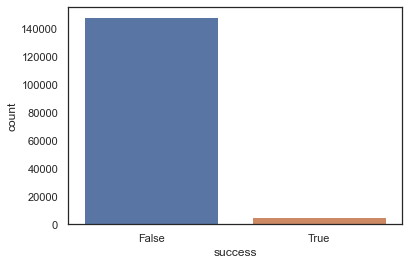

In [53]:
sns.countplot(movies_df['success'], label="Count")

Our target attribute is unbalanced. Later we will need to use some techniques to balance it.

#### Visualize Correlations

(7.5, -0.5)

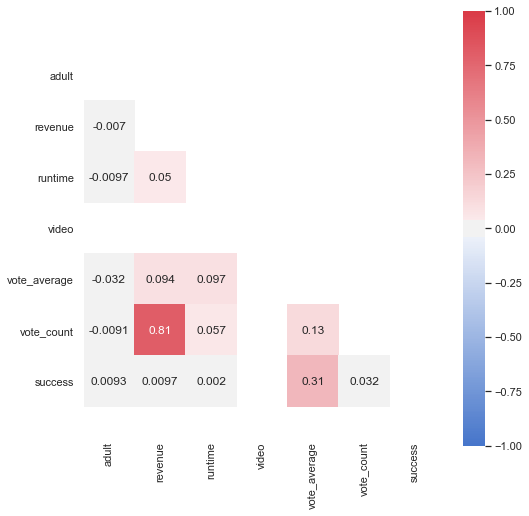

In [54]:
# Correlation Matrix Heatmap Visualization (should run this code again after removing outliers/zero values)
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(movies_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(8,8))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(movies_df.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

It's normal that our revenue is pretty correlated with vote_count. More revenue, more votes!

We finalize our work here. We discovered pretty good visualizations and did good transformations! Please, go to the next notebook called `4.Data_Wrangling.ipynb` to data wrangling our dataset.

In [29]:
movies_df.to_csv("../data/processed/transformation/movies_explored_list.csv")